In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt

In [2]:
tips='data/tips.csv'
data=pd.read_csv(tips)
print len(data)
data.head()

244


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
data.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [4]:
stat=data.describe()
stat.loc['range'] = stat.loc['max'] - stat.loc['min']  
stat.loc['var'] = stat.loc['std'] / stat.loc['mean']  #变异系数
stat.loc['dis'] = stat.loc['75%'] - stat.loc['25%']   #四分位数间距
stat

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000
range,47.740000,9.000000,5.000000
var,0.449936,0.461478,0.370125


In [6]:
data.median()
data.mode()
data.quantile(0.1)  #数据的百分位数  0.1代表百分之十的数据  data.quantile(q=0.5)

data.skew()   #数据的偏锋
data.kurt()   #数据的峰度

data.cov()
data.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


In [7]:
data.columns

Index([u'total_bill', u'tip', u'sex', u'smoker', u'day', u'time', u'size'], dtype='object')

In [8]:
data.columns.names

FrozenList([None])

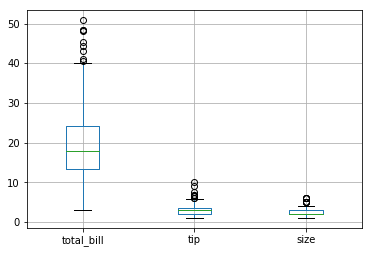

In [10]:
%matplotlib inline  #开始画图
data.boxplot(return_type='axes')  #画盒图

In [11]:
data.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


In [12]:
data.corr(method='kendall')

,total_bill,tip,size
total_bill,1.000000,0.517181,0.484342
tip,0.517181,1.000000,0.378185
size,0.484342,0.378185,1.000000


In [13]:
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [14]:
data2=data.set_index(['day','time'])
data2.head()

total_bill   tip     sex smoker  size
day time                                         
Sun Dinner       16.99  1.01  Female     No     2
    Dinner       10.34  1.66    Male     No     3
    Dinner       21.01  3.50    Male     No     3
    Dinner       23.68  3.31    Male     No     2
    Dinner       24.59  3.61  Female     No     4

In [15]:
data2.ix['Sun'].describe()

,total_bill,tip,size
count,76.000000,76.000000,76.000000
mean,21.410000,3.255132,2.842105
std,8.832122,1.234880,1.007341
min,7.250000,1.010000,2.000000
25%,14.987500,2.037500,2.000000
50%,19.630000,3.150000,2.000000
75%,25.597500,4.000000,4.000000
max,48.170000,6.500000,6.000000


In [17]:
print data2.ix['Fri'].ix['Lunch'].mean()
print data2.ix['Fri'].ix['Dinner'].mean()

total_bill    12.845714
tip            2.382857
size           2.000000
dtype: float64
total_bill    19.663333
tip            2.940000
size           2.166667
dtype: float64


In [18]:
data.groupby(['sex','smoker']).count()

total_bill  tip  day  time  size
sex    smoker                                  
Female No              54   54   54    54    54
       Yes             33   33   33    33    33
Male   No              97   97   97    97    97
       Yes             60   60   60    60    60